In [1]:
import tensorflow as tf
import numpy as np

# 建立 const 

In [2]:
#建立TensorFlow常數
ts_c = tf.constant(2,name='ts_c')

In [3]:
#查看TensorFlow常數

print(ts_c)

Tensor("ts_c:0", shape=(), dtype=int32)


# 建立 Variable

In [4]:
#建立TensorFlow變數
ts_x = tf.Variable(ts_c+5,name='ts_x')

In [5]:
#查看TensorFlow變數
ts_x
print(ts_x)

<tf.Variable 'ts_x:0' shape=() dtype=int32_ref>


# 建立Session執行Computational Graph

In [6]:
#建立session
sess=tf.Session()

In [7]:
#執行TensorFlow起始化變數
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
#使用sess.run顯示TensorFlow常數
print('ts_c=',sess.run(ts_c))

('ts_c=', 2)


In [9]:
#使用sess.run顯示TensorFlow變數
print('ts_x=',sess.run(ts_x))

('ts_x=', 7)


In [10]:
#使用.eval()方法顯示TensorFlow常數
print('ts_c=',ts_c.eval(session=sess))

('ts_c=', 2)


In [11]:
#使用.eval()方法顯示TensorFlow變數
print('ts_x=',ts_x.eval(session=sess))

('ts_x=', 7)


In [12]:
#關閉TensorFlow session
sess.close()    

# Session open close

In [13]:
import tensorflow as tf
ts_c = tf.constant(2,name='ts_c')
ts_x = tf.Variable(ts_c+5,name='ts_x')

sess=tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
print('ts_c=',sess.run(ts_c))
print('ts_x=',sess.run(ts_x))
sess.close()

('ts_c=', 2)
('ts_x=', 7)


# With語法開啟Session

In [14]:
import tensorflow as tf
ts_c = tf.constant(2,name='ts_c')
ts_x = tf.Variable(ts_c+5,name='ts_x')
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('ts_c=',sess.run(ts_c))
    print('ts_x=',sess.run(ts_x))

('ts_c=', 2)
('ts_x=', 7)


# placeholder

In [15]:
width = tf.placeholder("int32")
height = tf.placeholder("int32")
area=tf.multiply(width,height)

In [16]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('area=',sess.run(area,feed_dict={width: 6, height: 8}))

('area=', 48)


# Create dim  1 tensor

In [17]:
ts_X = tf.Variable([0.4,0.2,0.4])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X=sess.run(ts_X)
    print(X)

[0.4 0.2 0.4]


In [18]:
print(X.shape)

(3,)


# Create dim  2 tensor

In [19]:
ts_X = tf.Variable([[0.4,0.2,0.4]])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X=sess.run(ts_X)
    print(X)   

[[0.4 0.2 0.4]]


In [20]:
print('shape:',X.shape)

('shape:', (1, 3))


In [21]:
W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    W_array=sess.run(W)
    print(W_array)   
                        

[[-0.5 -0.2]
 [-0.3  0.4]
 [-0.5  0.2]]


In [22]:
print(W_array.shape)

(3, 2)


# matmul (y=X * W)

In [23]:
X = tf.Variable([[1.,1.,1.]])

W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])
                        
XW =tf.matmul(X,W )
                       
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(XW ))

[[-1.3  0.4]]


# Y=X*W+b

In [24]:
X = tf.Variable([[1.,1.,1.]])

W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])
                         

b = tf.Variable([[0.1,0.2]])
    
XWb =tf.matmul(X,W)+b


with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:')    
    print(sess.run(XWb ))

XWb:
[[-1.1999999  0.6      ]]


# Activation Function

## relu

In [25]:
import sys
sys.path.append('../')
from util.my_plot import show_activation

Using TensorFlow backend.


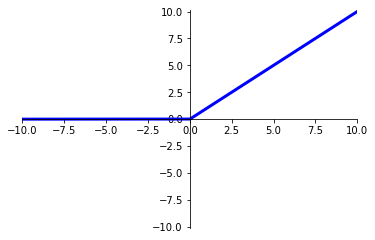

In [26]:
show_activation(tf.nn.relu,y_lim=10)

## y= relu ( (X․W ) + b )

In [27]:
y=tf.nn.relu(XWb)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:')    
    print(sess.run(XWb ))    
    print('y:')    
    print(sess.run(y ))

XWb:
[[-1.1999999  0.6      ]]
y:
[[0.  0.6]]


## sigmoid

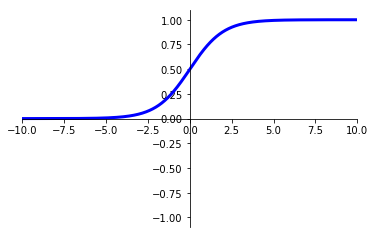

In [28]:
show_activation(tf.nn.sigmoid,y_lim=1)

# y= sigmoid ( (X․W ) + b )

In [29]:
y=tf.nn.sigmoid(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:')    
    print(sess.run(XWb))    
    print('y:')    
    print(sess.run(y ))

XWb:
[[-1.1999999  0.6      ]]
y:
[[0.23147522 0.6456563 ]]


# placeholder

In [30]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder("float", [None,3])
y=tf.nn.relu(tf.matmul(X,W)+b)

In [31]:
# 1 筆 input
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4]])
    (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict={X:X_array})

    print('b:')
    print(_b)    
    print('W:')
    print(_W)
    print('X:')
    print(_X)
    print('y:')
    print(_y)

b:
[[-0.8999285 -0.2823238]]
W:
[[ 0.01132684  0.34478822]
 [-0.8715888  -0.17273009]
 [-0.6897129   1.2811786 ]]
X:
[[0.4 0.2 0.4]]
y:
[[0.         0.33351693]]


In [32]:
# 3 筆 input
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4],
                        [0.3,0.4 ,0.5],
                        [0.3,-0.4,0.5]])    
    (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict={X:X_array})
    print('b:')
    print(_b)    
    print('W:')
    print(_W)
    print('X:')
    print(_X)
    print('y:')
    print(_y)

b:
[[1.3542823  0.31040496]]
W:
[[-1.1396341   0.35470605]
 [-0.14201607 -0.6373754 ]
 [ 1.8116026   0.16591851]]
X:
[[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y:
[[1.5946664  0.3911797 ]
 [1.8613869  0.24482587]
 [1.9749997  0.7547262 ]]


# 自行定義layer函數

In [2]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

## 一層的 MLP

In [3]:
X = tf.placeholder("float", [None,3])

y=layer(output_dim=2,input_dim=3,inputs=X, activation=tf.nn.relu)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4],
                        [0.3,0.4 ,0.5],
                        [0.3,-0.4,0.5]])    
    (_X,_y)=sess.run((X,y),feed_dict={X:X_array})
    print('X:')
    print(_X)
    print('y:')
    print(_y)    
    tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('log/area',sess.graph)

X:
[[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y:
[[0.38369742 1.4844968 ]
 [0.31068224 1.6377066 ]
 [0.8863493  0.33614397]]


## 二層的 MLP

In [35]:
X = tf.placeholder("float", [None,3])
h=layer(output_dim=4,input_dim=3,inputs=X,
        activation=tf.nn.relu)
y=layer(output_dim=2,input_dim=4,inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4]])    
    (layer_X,layer_h,layer_y)= sess.run((X,h,y),feed_dict={X:X_array})
    print('input Layer X:')
    print(layer_X)
    print('hidden Layer h:')
    print(layer_h)
    print('output Layer y:')
    print(layer_y)

input Layer X:
[[0.4 0.2 0.4]]
hidden Layer h:
[[0.         0.03732502 0.         0.4891312 ]]
output Layer y:
[[ 0.18262772 -0.95183945]]
